In [2]:
M = csvread('Dataset.csv');

# Explore Features
### Features:
**Demographics:** 1 Age, 2 Gender, 3 Education, 4 Country, 5 Ethnicity  
**Personality:** 6 Neuroticism, 7 Extraversion, 8 Openness, 9 Agreeableness, 10 Conscientiousness, 11 Impulsiveness, 12 Sensation Seeking
### Targets:
1 alcohol, 2 amphetamines, 3 amyl nitrite, 4 benzodiazepine, 5 caffeine, 6 cannabis, 7 chocolate, 8 cocaine, 9 crack, 10 ecstasy, 11 heroin, 12 ketamine, 13 legal highs, 14 LSD, 15 methadone, 16 mushrooms, 17 nicotine, 18 Semeron (ficticious), 19 volatile substance abuse (VSA)

In [3]:
X = M(:, 1:12); % Predictive Features
Y = M(:, 13:end); % Targets

### Coffee
#### Age vs. Gender

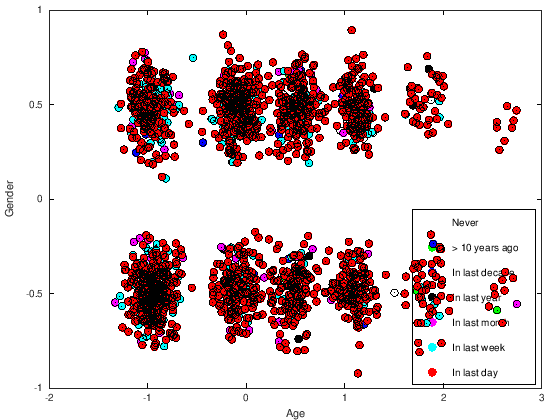

In [4]:
plotAll(X, Y(:, 5), 1, 2, 'Age', 'Gender', 0, 0.12);

#### Age vs. Education

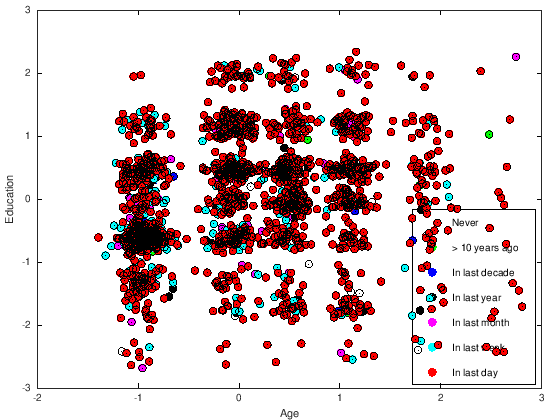

In [5]:
plotAll(X, Y(:, 5), 1, 3, 'Age', 'Education', 0, 0.12);

#### Age vs. Country

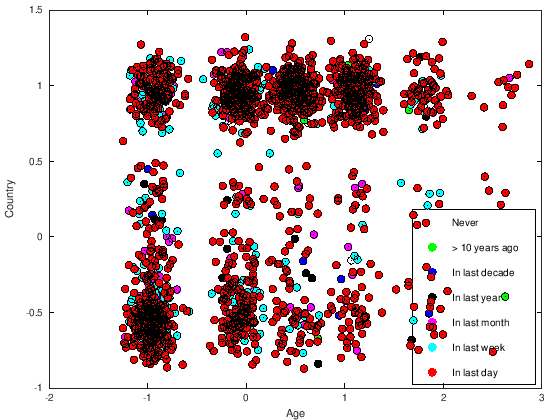

In [6]:
plotAll(X, Y(:, 5), 1, 4, 'Age', 'Country', 0, 0.12);

It seems clear that coffee is widely consumed across age, gender, education, and countries. Let's move on to a drug that is illegal in most countries, but tolerated in most.

### Cannabis

#### Age vs. Education

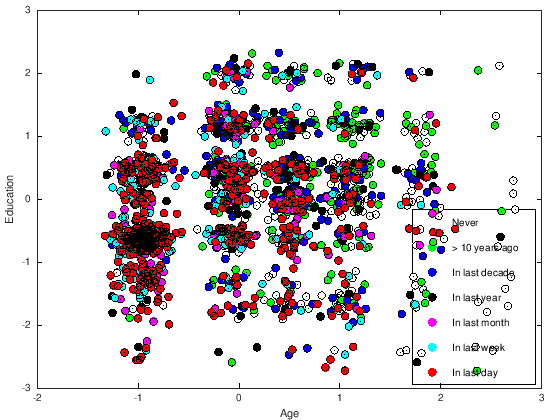

In [7]:
plotAll(X, Y(:, 6), 1, 3, 'Age', 'Education', 0, 0.13);

#### Openness vs. Sensation Seeing

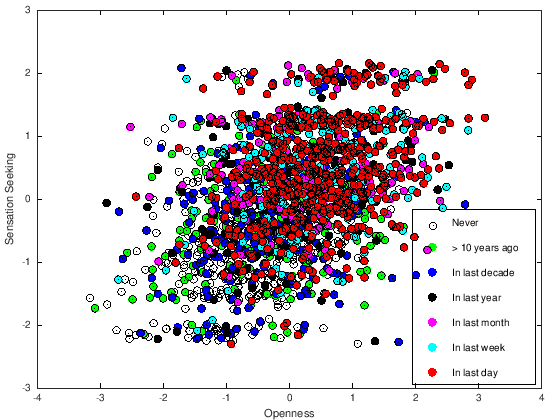

In [8]:
plotAll(X, Y(:, 6), 8, 12, 'Openness', 'Sensation Seeking', 0, 0.11);

#### Extraversion vs. Agreeableness

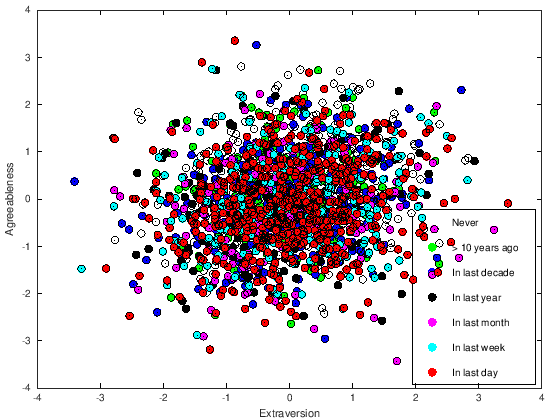

In [9]:
plotAll(X, Y(:, 6), 7, 9, 'Extraversion', 'Agreeableness', 0, 0.1);

### Cocaine

#### Age vs. Gender

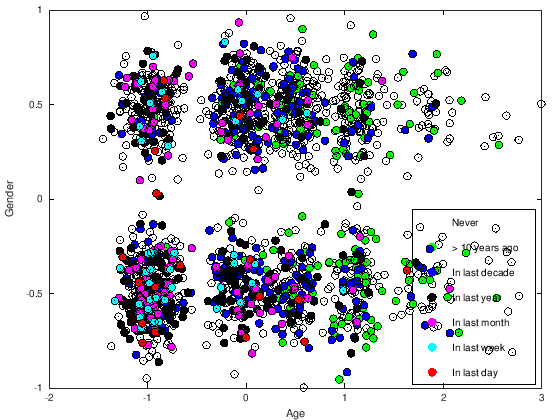

In [10]:
plotAll(X, Y(:, 8), 1, 2, 'Age', 'Gender', 0, 0.15);

#### Age vs. Sensation Seeking

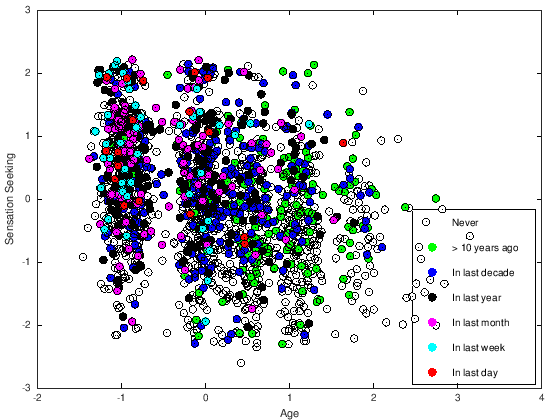

In [11]:
plotAll(X, Y(:, 8), 1, 12, 'Age', 'Sensation Seeking', 0, 0.15);

#### Age vs. Impulsiveness

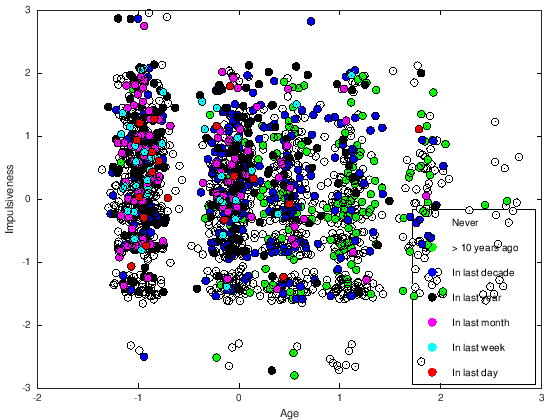

In [12]:
plotAll(X, Y(:, 8), 1, 11, 'Age', 'Impulsiveness', 0, 0.13);

# Logistic Regression

### Split Dataset

In [5]:
m = size(X, 1)
f = size(X, 2)

X_poly = X;

# This is needed AT LEAST FOR LOGISTIC REG
% Add features
for i=1:f
    X_poly = [X_poly X_poly(:, i).^2];
end

for i=1:2*f
    for j=i:2*f
        X_poly = [X_poly X_poly(:, i).*X_poly(:, j)];
    end
end

%{
# For NN Only
for i=1:f
    for j=i:f
        X_poly = [X_poly X_poly(:, i).*X_poly(:, j)];
    end
end
%}
size(X)

% Reduce dimensions
%[U,S,V] = svd(cov(X_poly));
%U_reduce = U(:, 1:250);
%X_poly = X_poly * U_reduce;

X_train = X_poly(1 : 0.6 * m , :);
Y_train = Y(1 : 0.6 * m , :);

%X_val = X_poly(0.6 * m + 1 : end, :);
%Y_val = Y(0.6 * m + 1 : end, :);

X_val = X_poly(0.6 * m + 1 : 0.8 * m, :);
Y_val = Y(0.6 * m + 1 : 0.8 * m, :);
%
X_test = X_poly(0.8 * m + 1 : end, :);
Y_test = Y(0.8 * m + 1 : end, :);

size(X_poly)

m =  1885
f =  12
ans =

   1885     12

ans =

   1885    324



### Training

In [173]:
% Classifier

function [theta, J, J_history, exit_flag] = cl_classifier(X, y, lambda, ground_truth, iters, alpha)

    theta = zeros(size(X, 2), 1);                % Initialize fitting parameters
    J_history = zeros(iters, 1);
    
    for iter = 1:iters
        [J, grad] = logisticCostFunction(theta, X, y == ground_truth, lambda);
        theta = theta - alpha * grad;
        J_history(iter) = J;
    end
end

In [174]:
% Multiclass Classifier

function [theta0, theta1, theta2, theta3, theta4, theta5, theta6] = multiclass_classifier(X, y, lambda, iters, alpha)
    [theta0, J, J_history, exit_flag] = cl_classifier(X, y, lambda, 0, iters, alpha);
    %plot([1:iters], J_history);
    [theta1, J, J_history, exit_flag] = cl_classifier(X, y, lambda, 1, iters, alpha);
    %plot([1:iters], J_history);
    [theta2, J, J_history, exit_flag] = cl_classifier(X, y, lambda, 2, iters, alpha);
    %plot([1:iters], J_history);
    [theta3, J, J_history, exit_flag] = cl_classifier(X, y, lambda, 3, iters, alpha);
    %plot([1:iters], J_history);
    [theta4, J, J_history, exit_flag] = cl_classifier(X, y, lambda, 4, iters, alpha);
    %plot([1:iters], J_history);
    [theta5, J, J_history, exit_flag] = cl_classifier(X, y, lambda, 5, iters, alpha);
    %plot([1:iters], J_history);
    [theta6, J, J_history, exit_flag] = cl_classifier(X, y, lambda, 6, iters, alpha);
    %plot([1:iters], J_history);
end

In [175]:
function [predictions] = predict(X, theta0, theta1, theta2, theta3, theta4, theta5, theta6)
    p0 = sigmoid(X * theta0);
    p1 = sigmoid(X * theta1);
    p2 = sigmoid(X * theta2);
    p3 = sigmoid(X * theta3);
    p4 = sigmoid(X * theta4);
    p5 = sigmoid(X * theta5);
    p6 = sigmoid(X * theta6);
    
    p_array = [p0'; p1'; p2'; p3'; p4'; p5'; p6'];
    [max_values predictions] = max(p_array);
    predictions = predictions - 1;
end

In [178]:
% Cannabis
y = Y_train(:,10);

lambda = 1;
iters = 2000;
alpha = 0.07;

[theta0, theta1, theta2, theta3, theta4, theta5, theta6] = multiclass_classifier(X_train, y, lambda, iters, alpha);

    cl_classifier at line 11 column 1
    multiclass_classifier at line 2 column 35
    cl_classifier at line 11 column 1
    multiclass_classifier at line 4 column 35
    cl_classifier at line 11 column 1
    multiclass_classifier at line 6 column 35
    cl_classifier at line 11 column 1
    multiclass_classifier at line 8 column 35
    cl_classifier at line 11 column 1
    multiclass_classifier at line 10 column 35
    cl_classifier at line 11 column 1
    multiclass_classifier at line 12 column 35
    cl_classifier at line 11 column 1
    multiclass_classifier at line 14 column 35


In [179]:
% TRAINING ACCURACY
predictions = predict(X_train, theta0, theta1, theta2, theta3, theta4, theta5, theta6);
y = Y_train(:,10);
Accuracy = mean(double(y == predictions')) * 100

% F1 score
fscore(y, predictions, 0)
fscore(y, predictions, 1)
fscore(y, predictions, 2)
fscore(y, predictions, 3)
fscore(y, predictions, 4)
fscore(y, predictions, 5)
fscore(y, predictions, 6)

Accuracy =  76.039
ans =  0.81871
ans =  0.51852
ans =  0.42462
ans =  0.55065
ans =  0.44571
ans =  0.75000
ans =  0.66667


Accuracy =  92.485
ans =  1.8388
ans =  0.68852
ans =  0.46296
ans =  0.57778
ans =  0.50000
ans =  0.66667
ans = NaN

In [180]:
% VALIDATION
y = Y_val(:, 10);
%[theta0, theta1, theta2, theta3, theta4, theta5, theta6] = multiclass_classifier(X_val, y, lambda, iters, alpha);
predictions = predict(X_val, theta0, theta1, theta2, theta3, theta4, theta5, theta6);
Accuracy = mean(double(y == predictions')) * 100

fscore(y, predictions, 0)
fscore(y, predictions, 1)
fscore(y, predictions, 2)
fscore(y, predictions, 3)
fscore(y, predictions, 4)
fscore(y, predictions, 5)
fscore(y, predictions, 6)

predictions(find(y == 1));

Accuracy =  39.788
ans =  0.52482
ans =  0.085106
ans =  0.13889
ans =  0.23913
ans =  0.078740
ans = NaN
ans = NaN


In [181]:
% VALIDATION
y = Y_test(:, 10);
%[theta0, theta1, theta2, theta3, theta4, theta5, theta6] = multiclass_classifier(X_val, y, lambda, iters, alpha);
predictions = predict(X_test, theta0, theta1, theta2, theta3, theta4, theta5, theta6);
Accuracy = mean(double(y == predictions')) * 100

fscore(y, predictions, 0)
fscore(y, predictions, 1)
fscore(y, predictions, 2)
fscore(y, predictions, 3)
fscore(y, predictions, 4)
fscore(y, predictions, 5)
fscore(y, predictions, 6)

predictions(find(y == 1));

Accuracy =  51.989
ans =  0.65882
ans =  0.052632
ans =  0.17460
ans =  0.15152
ans =  0.15584
ans = NaN
ans = NaN


## Recent Users vs. Non-users

In [20]:
Y_u_train = Y_train(:, [2,3,8,9,10,11,12,13,14,15,16,19]);
Y_u_train = max(Y_u_train');
Y_u_train = (Y_u_train' >= 3);

Y_u_val = Y_val(:, [2,3,8,9,10,11,12,13,14,15,16,19]);
Y_u_val = max(Y_u_val');
Y_u_val = (Y_u_val' >= 3);

Y_u_test = Y_test(:, [2,3,8,9,10,11,12,13,14,15,16,19]);
Y_u_test = max(Y_u_test');
Y_u_test = (Y_u_test' >= 3);

(size(find(Y_u_train==0),1)+size(find(Y_u_val==0),1)+size(find(Y_u_test==0),1))/(size(Y_u_train, 1)+size(Y_u_val, 1)+size(Y_u_test, 1))

ans =  0.49549


In [82]:
% Train
lambda = 0;
iters = 2500;
alpha = 0.07;

size(X_train)
size(Y_u_train)

[theta, J, J_history, exit_flag] = cl_classifier(X_train, Y_u_train, lambda, 1, iters, alpha);
plot([1:iters], J_history);

ans =

   1131    324

ans =

   1131      1

    cl_classifier at line 11 column 1
                                                                               
  0.7 |--------------------------------------------------------------------|   
      |             +             +            +             +             |   
 0.65 |-+                                                                +-|   
      |                                                                    |   
      |                                                                    |   
  0.6 |-+                                                                +-|   
      |                                                                    |   
      |                                                                    |   
 0.55 |-+                                                                +-|   
      |                                                                    |   
  0.5 |-+                           

In [95]:
% Training Error
predictions = (sigmoid(X_train * theta) > 0.5);
mean(double(Y_u_train == predictions))
precision(Y_u_train, predictions, 0)
recall(Y_u_train, predictions, 0)
fscore(Y_u_train, predictions, 0)
precision(Y_u_train, predictions, 1)
recall(Y_u_train, predictions, 1)
fscore(Y_u_train, predictions, 1)

ans =  0.86472
ans =  0.77434
ans =  0.87646
ans =  0.82224
ans =  0.74752
ans =  0.85150
ans =  0.79613


In [96]:
% Validation error
predictions = (sigmoid(X_val * theta) > 0.5);
mean(double(Y_u_val == predictions))

precision(Y_u_val, predictions, 0)
recall(Y_u_val, predictions, 0)
fscore(Y_u_val, predictions, 0)

precision(Y_u_val, predictions, 1)
recall(Y_u_val, predictions, 1)
fscore(Y_u_val, predictions, 1)

ans =  0.77984
ans =  0.52299
ans =  0.67407
ans =  0.58900
ans =  0.70979
ans =  0.83884
ans =  0.76894


In [97]:
% Test error
predictions = (sigmoid(X_test * theta) > 0.5);
mean(double(Y_u_test == predictions))

precision(Y_u_test, predictions, 0)
recall(Y_u_test, predictions, 0)
fscore(Y_u_test, predictions, 0)

precision(Y_u_test, predictions, 1)
recall(Y_u_test, predictions, 1)
fscore(Y_u_test, predictions, 1)

ans =  0.83024
ans =  0.71300
ans =  0.79500
ans =  0.75177
ans =  0.70642
ans =  0.87006
ans =  0.77975


ans =  0.80239
ans =  1.0089
ans =  1.2550

# Neural Network

In [150]:
Y_u_train = Y_train(:, [2,3,8,9,10,11,12,13,14,15,16,19]);
Y_u_train = max(Y_u_train');
Y_u_train = (Y_u_train' >= 3)+1;

Y_u_val = Y_val(:, [2,3,8,9,10,11,12,13,14,15,16,19]);
Y_u_val = max(Y_u_val');
Y_u_val = (Y_u_val' >= 3)+1;

Y_u_test = Y_test(:, [2,3,8,9,10,11,12,13,14,15,16,19]);
Y_u_test = max(Y_u_test');
Y_u_test = (Y_u_test' >= 3)+1;

size(X_train)
size(Y_u_train)

size(X_val)
size(Y_u_val)

size(X_test)
size(Y_u_test)
Y_u_train(1:10)

ans =

   1131     90

ans =

   1131      1

ans =

   377    90

ans =

   377     1

ans =

   377    90

ans =

   377     1

ans =

   1
   2
   1
   1
   1
   1
   1
   1
   1
   1



In [151]:
function [p, a] = predict_NN2(Theta1, Theta2, X, y)

    m = size(X, 1);
    num_labels = size(Theta2, 1);

    p = zeros(size(X, 1), 1);

    h1 = sigmoid([ones(m, 1) X] * Theta1');
    h2 = sigmoid([ones(m, 1) h1] * Theta2');
    [v, p] = max(h2, [], 2);

    Accuracy = mean(double(p == y)) * 100 
end

In [168]:
lambda = 3;
input_layer_size = size(X_train, 2)
hidden_layer_size = 100;
num_labels = 2;

initial_Theta1 = randInitializeWeights(input_layer_size, hidden_layer_size);
initial_Theta2 = randInitializeWeights(hidden_layer_size, num_labels);

% Unroll parameters
initial_nn_params = [initial_Theta1(:) ; initial_Theta2(:)];

options = optimset('MaxIter', 100); 
% Create "short hand" for the cost function to be minimized
costFunction = @(p) nnCostFunction(p, ...
                                   input_layer_size, ...
                                   hidden_layer_size, ...
                                   num_labels, X_train, Y_u_train, lambda);

% Now, costFunction is a function that takes in only one argument (the
% neural network parameters)
[nn_params, cost] = fmincg(costFunction, initial_nn_params, options);

% Obtain Theta1 and Theta2 back from nn_params
Theta1 = reshape(nn_params(1:hidden_layer_size * (input_layer_size + 1)), ...
                 hidden_layer_size, (input_layer_size + 1));

Theta2 = reshape(nn_params((1 + (hidden_layer_size * (input_layer_size + 1))):end), ...
                 num_labels, (hidden_layer_size + 1));

%[J_history, Theta1, Theta2] = trainNN(X_train, Y_u_train, hidden_layer_size, num_labels, lambda, alpha, iters, NaN, NaN);


input_layer_size =  90
Iteration   100 | Cost: 6.876862e-01


In [169]:
%plot([1:iters], J_history);
pred = predict_NN2(Theta1, Theta2,X_train, Y_u_train);
precision(Y_u_train, pred, 1)
recall(Y_u_train, pred, 1)
fscore(Y_u_train, pred, 1)

precision(Y_u_train, pred, 2)
recall(Y_u_train, pred, 2)
fscore(Y_u_train, pred, 2)
% J_history(end)
% size(Theta2)

error: graphics_toolkit: ([1:iters], J_history); toolkit is not available
error: called from
    graphics_toolkit at line 81 column 5
Accuracy =  90.009
ans =  0.83033
ans =  0.92321
ans =  0.87431
ans =  0.80450
ans =  0.87406
ans =  0.83784


In [170]:
pred = predict_NN2(Theta1, Theta2,X_val, Y_u_val);
precision(Y_u_val, pred, 1)
recall(Y_u_val, pred, 1)
fscore(Y_u_val, pred, 1)

precision(Y_u_val, pred, 2)
recall(Y_u_val, pred, 2)
fscore(Y_u_val, pred, 2)
% J_history(end)
% size(Theta2)

Accuracy =  81.963
ans =  0.58788
ans =  0.71852
ans =  0.64667
ans =  0.75714
ans =  0.87603
ans =  0.81226


In [171]:
pred = predict_NN2(Theta1, Theta2,X_test, Y_u_test);
precision(Y_u_test, pred, 1)
recall(Y_u_test, pred, 1)
fscore(Y_u_test, pred, 1)

precision(Y_u_test, pred, 2)
recall(Y_u_test, pred, 2)
fscore(Y_u_test, pred, 2)
% J_history(end)
% size(Theta2)

Accuracy =  84.881
ans =  0.74324
ans =  0.82500
ans =  0.78199
ans =  0.73113
ans =  0.87571
ans =  0.79692


In [ ]:
% Results

input_layer_size =  90
Iteration   300 | Cost: 7.676032e-01

Training:
Accuracy =  88.329
ans =  0.80444
ans =  0.90651
ans =  0.85243
ans =  0.77551
ans =  0.85714
ans =  0.81429

Validation:
Accuracy =  81.698
ans =  0.58683
ans =  0.72593
ans =  0.64901
ans =  0.75269
ans =  0.86777
ans =  0.80614

Test:
Accuracy =  85.942
ans =  0.75909
ans =  0.83500
ans =  0.79524
ans =  0.74762
ans =  0.88701
ans =  0.81137

% with maxiter = 300, lambda = 5, hidden = 200, only NN features (90), K = 2
% almost same with 100 iters, lambda = 3, hidden = 100, 90 features, 

In [ ]:
# Next, try ALL features, 50 hidden, 10 reg, 10 iters